# Workshop Big Data Analytics 05/07/2019

##### Oleh: Rosihan Ari Yuana

Scope pembahasan pada workshop ini adalah sebagai berikut:

<ul>
    <li>Cara Menjalankan Python (Jupyter Notebook di Cloud)</li>
    <li>Operasi Aritmatika di Python</li>
    <li>Function di Python</li>
    <li>Tipe Data di Python</li>
    <li>Struktur Kontrol</li>
    <li>Import/Export</li>
    <li>Graphics</li>
    <li>Install Library</li>
    <li>Dataset Source</li>
</ul>
    

## Cara Menjalankan Python (Jupyter Notebook di AWS Cloud)

Jupyter Notebook merupakan environment yang bisa digunakan untuk menjalankan/mengeksekusi program Python, tanpa melalui shell command. Tampilan interface Jupyter Notebook sangat pas untuk menggabungkan proses data collecting, data preparing, data processing, sampai merepresentasikan hasil data analytics melalui visualization (graphics).

Untuk menjalankan Jupyter Notebook di AWS Cloud bisa melalui 2 cara:
<ul>
    <li>Melalui Amazon EC2 (sangat ribet)</li>
    <li>Melalui Amazon SageMaker (sangat mudah - recommended)</li>
</ul>

Sebelum membuat instance Jupyter Notebook di SageMaker, perlu diperhatikan kebutuhan <a href="https://aws.amazon.com/sagemaker/pricing/instance-types/">spesifikasi</a> server dan <a href="https://aws.amazon.com/sagemaker/pricing/">costnya</a>.

## Penulisan Ekspresi di Python

In [1]:
2 + 3

5

In [6]:
a = 2 + 4
print(a)

6


In [7]:
b = (a + 2) * (a - 3)
print(a+b)

30


In [8]:
c = True or not False
print(c)

True


In [17]:
d = c and ("Hello" > "Helli")
print(d)

True


## Function di Python

In [13]:
# non void
def jumlah(a, b):
    return a + b

print("Hasil:", jumlah(10, 20))

Hasil: 30


In [14]:
# void
def hello(s = "Hello World"):
    print(s)

hello()
hello("Hello Python")

Hello World
Hello Python


In [16]:
# multiple arguments
def printLen(*data):
    return len(data)

print(printLen(5, 2, 3))
print(printLen(2, 3))
print(printLen())

3
2
0


## Tipe Data Terstruktur di Python

### List (Mirip Array)

Index nya dimulai dari 0 (0, 1, 2, ...). Bersifat mutable.

In [22]:
# 1-dimensional list

a = [10, 30, 32, 60, 67]

# slicing
print(a[0])
print(a[1:4])
print(a[:5])
print(a[2:])

10
[30, 32, 60]
[10, 30, 32, 60, 67]
[32, 60, 67]


In [23]:
a[0] = 100
print(a)

[100, 30, 32, 60, 67]


In [19]:
# 2-dimensional list

a = [[3, 1, 4], 
     [4, 5, 6], 
     [5, 1, 6]]

# slicing
print(a[0][2])
print(a[1])

4
[4, 5, 6]


### Dictionary (Mirip Associative Array)

Index nya tidak dimulai 0, tapi bisa customized (Berupa pasangan key-value). Bersifat mutable.

In [20]:
mhs = {'nama': 'Rosihan Ari',
       'nim': 'M0197065',
       'alamat': 'Solo'}

print(mhs['nim'])

M0197065


In [24]:
mhs['nama'] = 'Dwi Amalia Fitriani'
print(mhs)

{'nama': 'Dwi Amalia Fitriani', 'nim': 'M0197065', 'alamat': 'Solo'}


### DataFrame

<p>Representasi dari tipe data ini adalah mirip sebuah tabel (memiliki index baris dan kolom).</p>
<p>Untuk membuat tipe data ini dibutuhkan library Panda.</p>
<p>Biasanya tipe data ini dihasilkan dari import file dataset (csv, excel, json, mysql, dll)</p>

In [32]:
import pandas as pd

data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18],
        'Address': ['A', 'B', 'C', 'D']}

df = pd.DataFrame(data)
print(df)

    Name  Age Address
0    Tom   20       A
1   nick   21       B
2  krish   19       C
3   jack   18       D


In [33]:
print(df['Name'])

0      Tom
1     nick
2    krish
3     jack
Name: Name, dtype: object


In [34]:
print(df['Name'][0])

Tom


In [37]:
print(df[['Name', 'Age']])

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


### Numpy Array

Tipe data mirip list (mutable), tapi lebih ideal untuk komputasi numerik (aljabar linear). Untuk mendefinisikan suatu array, digunakan library Numpy -> Numpy Array

In [43]:
import numpy as np

a = np.array([10, 24, 21, 45])
print(a)

[10 24 21 45]


In [44]:
print(a[1])
print(a[:3])

24
[10 24 21]


<b>Numpy Array Vs List</b>

In [41]:
a = [1, 2, 3, 4]
b = [2, 3, 4, 5]
print(a + b)

[1, 2, 3, 4, 2, 3, 4, 5]


In [42]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([2, 3, 4, 5])
print(a + b)

[3 5 7 9]


## Struktur Kontrol di Python

In [45]:
# conditional IF

nilai = 60

if (nilai > 85):
    print('A')
elif (nilai > 70):
    print('B')
elif (nilai > 60):
    print('C')
else:
    print('D')

D


In [46]:
# looping FOR

for i in range(5):
    print('Hello World')

Hello World
Hello World
Hello World
Hello World
Hello World


In [49]:
# looping WHILE

a = 1
while True:
    print('Hello')
    a += 1
    if (a > 5):
        break

Hello
Hello
Hello
Hello
Hello


## Import/Export Data

### Import CSV from Amazon S3

In [2]:
import s3fs
s3 = s3fs.S3FileSystem()

# menampilkan list nama file dalam bucket
s3.ls('rosihanari')

['rosihanari/HackerNewsPosts.csv', 'rosihanari/Sample - Superstore.xls']

In [51]:
# import data file HackerNewsPosts.csv dari bucket

import pandas as pd

with s3.open('rosihanari/HackerNewsPosts.csv', 'rb') as f:
    df = pd.read_csv(f)

# tampilkan 5 baris data pertama    
df[:5]

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


### Import Excel from Amazon S3

In [53]:
import pandas as pd
from pandas import ExcelFile

with s3.open('rosihanari/Sample - Superstore.xls', 'rb') as f:
    df = pd.read_excel(f)

# tampilkan 5 baris data pertama    
df[:5]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Import JSON from Internet

In [62]:
import json
from urllib.request import urlopen

# membaca data json dari URL
response = urlopen('https://jsonplaceholder.typicode.com/users')
data = response.read()

jsonData = json.loads(data)

### Export DataFrame to CSV - Stored in Amazon S3

In [79]:
import pandas as pd

# data format dataframe yg akan diexport ke csv
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18],
        'Address': ['A', 'B', 'C', 'D']}

df = pd.DataFrame(data)

# export data ke csv stlh diencode ke byte
bytes_to_write = df.to_csv(index = None, header=True).encode()

# letakkan file csv ke bucket S3
with s3.open('rosihanari/data.csv', 'wb') as f:
    f.write(bytes_to_write)

## Creating Graphics with Matplotlib - PyPlot

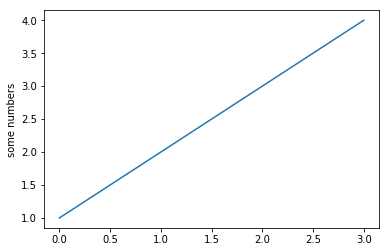

In [86]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

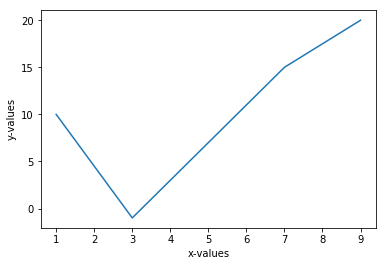

In [89]:
plt.plot([1, 3, 7, 9], [10, -1, 15, 20])
plt.ylabel('y-values')
plt.xlabel('x-values')
plt.show()

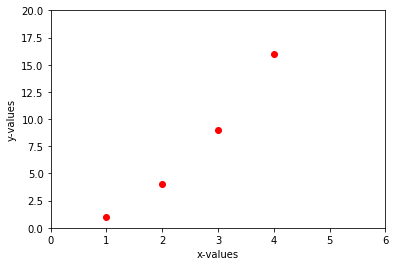

In [91]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.ylabel('y-values')
plt.xlabel('x-values')
plt.axis([0, 6, 0, 20])
plt.show()

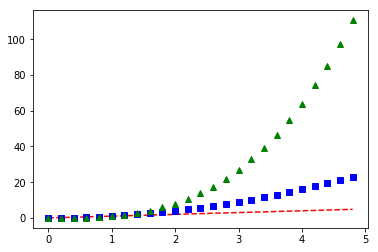

In [92]:
import numpy as np

# membuat sampel data x 0-5 lebar subinterval 0.2
x = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.show()

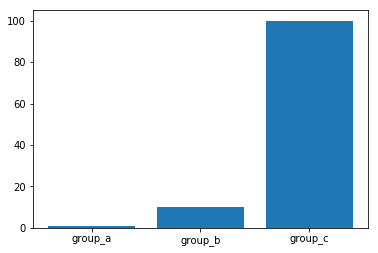

In [93]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.bar(names, values)
plt.show()

## Cara Install Python Library

In [9]:
# install library tweepy (crawling tweets)

import sys
!{sys.executable} -m pip install tweepy

    100% |████████████████████████████████| 153kB 34.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
import tweepy

# setting API Twitter key & token
consumer_key = "..."
consumer_secret = "..."
access_token = "..."
access_token_secret = "..."

In [12]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [13]:
# crawl 10 data twits keyword '#bigdata' dari 01/05/2018 
for tweet in tweepy.Cursor(api.search,q="#bigdata",
                           lang="en",
                           since="2018-05-01").items(10):
    print(tweet.created_at, tweet.text)

2019-07-04 23:49:20 RT @DeepLearn007: There's No #AI without IA {Info Architecture}
@JimMarous @SpirosMargaris @Xbond49 @psb_dc @TheRudinGroup @TopCyberNews @i…
2019-07-04 23:49:05 RT @AzureCosmosDB: Based on popular ask, we've put all the *Cosmic Notes* in one location - learn more about #CosmosDB, one Cosmic Note at…
2019-07-04 23:49:00 RT @DeepLearn007: There's No #AI without IA {Info Architecture}
@JimMarous @SpirosMargaris @Xbond49 @psb_dc @TheRudinGroup @TopCyberNews @i…
2019-07-04 23:48:46 RT @thekaushalsoni: 🔌What are the 7 Key #Marketing Concepts In The #Digital Era? [ #DigitalMarketing ] ◆ Follow: https://t.co/R9YJ3qlrBQ ◆…
2019-07-04 23:48:31 RT @wiwer77: #Facebook outage gave a glimpse at how its AI analyses images
https://t.co/bnsZdf4Ht3
#AI #IA #BigData #BlockChain #Robots #St…
2019-07-04 23:48:30 RT @wiwer77: Artificial Intelligence is going the Wrong way. Why? https://t.co/wkQap6y0jN
#AI #IA #BigData #BlockChain #Robots #Startup #Py…
2019-07-04 23:48:30 RT @KirkDBorne: 

### Sumber Dataset (untuk projects mhs)

* <a href="https://www.kaggle.com/datasets">Kaggle</a>
* <a href="https://data.cityofnewyork.us">New York City Open Data</a>